## Understanding "Trade War" from Twitter

Years of trade tensions between the world’s two biggest economies have taken a worse turn since the start of 2018. President Donald Trump's "trade war" officially began on March 1 when he announced steep tariffs on steel and aluminum, which were then signed into effect on March 8. The situation escalated since March 22, when U.S. Trade Representative proposed 25 percent duties on Chinese products and China quickly fought back by levying tariffs on $3 billion of U.S. imports. From April 03 onwards, the focus is at Intellectual property abd high-tech industrial products.	

"Trade war" has become a focal topic on social media. Twitter, being one of the largest social media platform, has recorded hundreds of thousands of people's opinions on this issue. The figure below depicts the number of tweets generated each day concerning about the "trade war". The three jumps clearly match with the three critical dates on the timeline. 

![title](figures/figure1_twitter_counts.png)

### Project proposal

I propose a project to understand what is going on exactly with the trade war through analyzing twitter data. I propose two directions to work on for this project. 

1. Events related to "trade war" demonstrated great impact on stock market volitality. Market movement is a result of population behavior. Market indices plunged in response to the news reflects population's pessimistic opinions over the outcome of a trade war. Twitter, a leading social media platform where people can express their feelings and insights on trending news with low latency, composes a good data source with potential prediction power over the market movement. 


2. "Trade war" has gone beyond a politic/economic topic, but will closely affect our daily life in the near future. By analyzing the topics that are co-mentioned in tweets with "trade war", I wish to identify the insightful predictions made by the general public that are likely to come true, and based on them we can have a better picture of when and how is the trade war going to affect our life. For example, is there any field of indursty that we should avoid in future job hunting, as they may be closely affected by the outcome of trade war? Can we simply trust all the news media that are taking positions and making foresights on the idea of "trade war"? When it comes to making predictions, are the journalists/experts smarter than ordinary people? “Two heads are better than one”, and in the era of big data, we should hear as many voices as possible before reaching a conclusion.


In retrospect, one may be surprised to find out that, sometimes people were able to predict the future correctly. It is based on their backgrounds, experiences, concerns, and the information that they happen to collect correctly for the problem. Just like one tree in a trained random forest model that happens to utilize the correct subset of data from the information space availble, and make the correct conclusion, I am interested to find out whether there are such tweets that we can learn from before the future arrives. 


### Data collection

This project requires data from historical tweets that happened more than 30 days ago. I adopted part of the code from Jefferson-Henrique/GetOldTweets-python on github. The historical tweets retrieval code conducts twitter search through browser, rather than the Twitter search API which imposes date and rate limitations to historical search. For collecting forecoming tweets, I used Twitter streaming API.

### Import libraries

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from wordcloud import WordCloud

%matplotlib inline

### Figure 1. Market index dumps while twitter discussion of trade war heats up


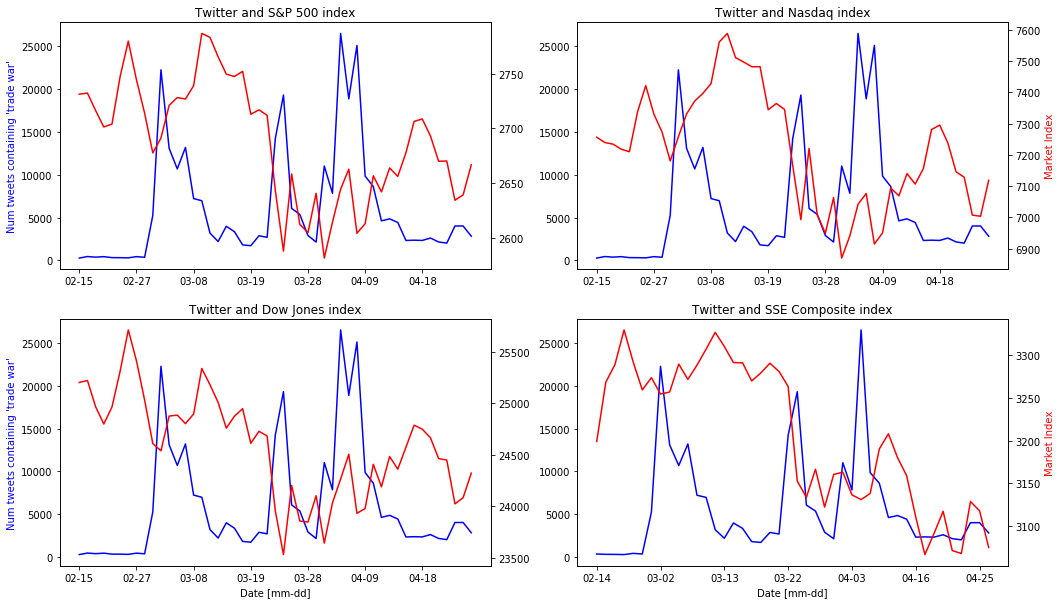

In [22]:
# for plots below, we zoom into the period of 02-13 to 04-26. 
# As for the previous period, other events may affect market index.
plt.rcParams['figure.figsize'] = (17.0, 10.0)
fig, ax = plt.subplots(2, 2)

index_name = ['S&P 500', 'Dow Jones', 'Nasdaq', 'SSE Composite']
column_index = [2, 3, 4, 7]
start_dates = [31, 31, 31, 30]
fileName = 'daily_tweets_count_sample_data_FOUR.csv'
for idx in range(4):
    with open(fileName) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        dates = []
        tweet_counts = []
        indices = []
        for row in readCSV:
            if idx < 3:
                date = row[0]
                tweet_count = int(row[1])
                index = float(row[column_index[idx]])
                dates.append(date)
                tweet_counts.append(tweet_count)
                indices.append(index)
            else:
                if row[5] != '':
                    date = row[5]
                    tweet_count = int(row[6])
                    index = float(row[column_index[idx]])
                    dates.append(date)
                    tweet_counts.append(tweet_count)
                    indices.append(index)
        
        axes = ax[idx%2, idx//2]
        start_date = start_dates[idx]
        interval = 7
        tmp = slice(start_date, len(dates))
        ax1 = axes
        ax2 = ax1.twinx()
        ax1.plot(dates[tmp], tweet_counts[tmp], 'b-')
        ax2.plot(dates[tmp], indices[tmp], 'r-')
        if idx//2 == 0:
            ax1.set_ylabel('Num tweets containing \'trade war\'', color='b')
        else:
            ax2.set_ylabel('Market Index', color='r')
        if idx%2 == 1:
            ax1.set_xlabel('Date [mm-dd]', color='k')
        locs = ax1.get_xticks()
        ax1.set_xticks(locs[0:len(locs):interval])
        ax1.set_xticklabels([date[5:] for date in dates[start_date:len(dates):interval]])
        ax1.set_title('Twitter and ' + index_name[idx] + ' index')

figureName = './figures/figure1_tweet_marketIndex.png'
#fig.savefig(figureName, dpi = 90)

Figure 1. Four panels showing the number of tweets containing "trade war" (blue) on each day and the market index daily close values (red) respectively. Market index names can be found in the title of each subplot. S&P 500, Dow Jones and Nasdaq are U.S. market indices. SSE composite is a stock market index of all stocks that are traded at the Shanghai Stock Exchange. 

We can see from the red curves that on March 01, the impact of "trade war" on marekt is not as significant as compared to March 22 and April 02-03, because real actions were only taken on the latter two dates.  

### Figure 2. Wordclouds of topics co-mentioned in "trade war" tweets

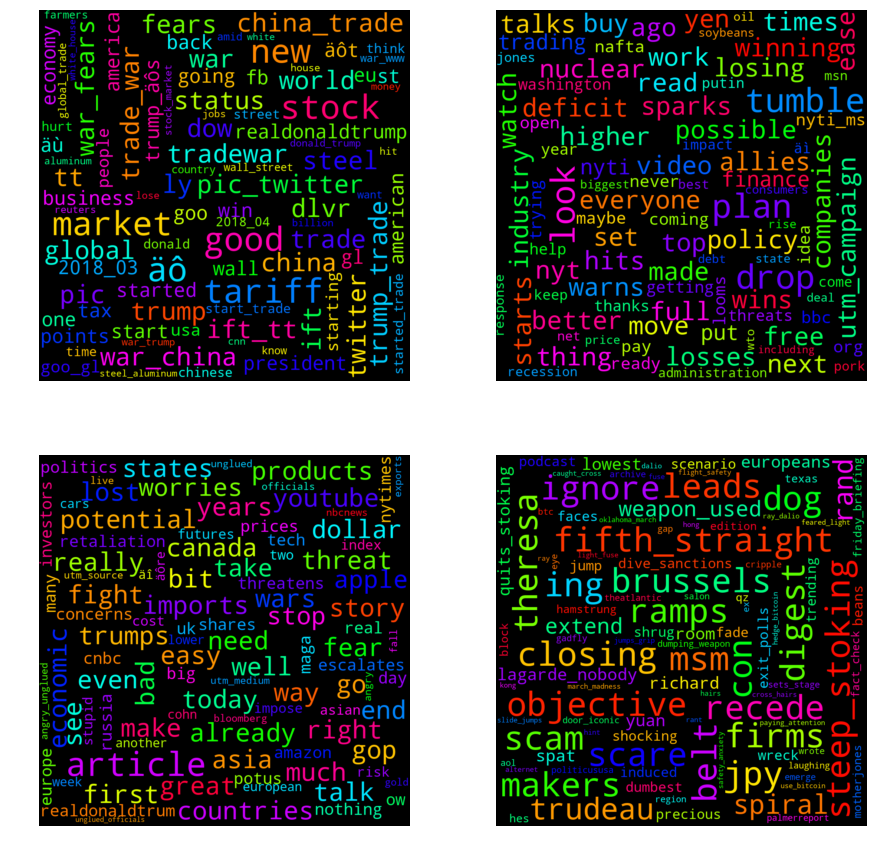

In [64]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
fig, ax = plt.subplots(2, 2)

num_features = 100
count = 0
for max_fq in [1.0, 0.1, 0.01, 0.001]: #0.0001, 0.00001
    fileName = 'tweet_keyword_tradewar_tfidf_features_' + str(max_fq) + '_' + str(num_features) + '_v5.csv'
    word_text = open(fileName).read()
            
    wordcloud = WordCloud(colormap = 'hsv', max_font_size = 90, max_words=800, width =1000, height = 1000, margin=3, collocations=False).generate(word_text)
    #random_state=3， margin=0,
    #wordcloud.to_file("wordcloud.png")
    
    axes = ax[count%2, count//2]
    axes.imshow(wordcloud, interpolation="bilinear") 
    axes.set_xlabel('max_df = ' + str(max_fq))
    axes.axis("off")
    count += 1
    #plt.figure(figsize=(10,5))
    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    #plt.show()

figureName = './figures/figure2_tweet_wordCloud.png' 
#fig.savefig(figureName, dpi = 90)


Figure 2. Four panels showing the wordclouds of most frequent words (uni-gram and bi-gram) co-mentioned with "trade war" in tweets since 2018. Word scores were calculated by TFIDF. Each of the four panels contain words with top scores after ignoring words that have a document frequency higher than 1.0, 0.1, 0.01, 0.001 respectively (from top to bottom, from left to right), to recover interesting keywords that might be low in frequency. Furthermore, to prevent repeating of words between panels, the words already appeared in the previous panels will be add to the list of stopwords for subsequent wordcloud generation. 

We can see that, as the capped document frequency reduces, more interesting words appear in the wordclouds, such as "nuclear", "soybean", "apple", "brussels", "belt", "stoking". These tweets may be from a minority of people that were not following the trends but were able to think independently. My interest lies in capturing these tweets efficiently while preserving the original content structure. One idea I am thinking of trying, is to assign higher scores to words that are normally distant from each other but co-occurred in tweets. This way, maybe I can recover topics that seem to be farfetching and less discussed, but might promotes more insightful ideas. 


### Future work


A few more ideas: 

1. Using tweets to train a GAN network, and let it generate more tweets. Can it generate any interesting insights? 

2. Using tweets to do backtesting for market prediction.

3. Generate time-sectional wordclouds, to reflect the trending topics change over time. 